# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import matplotlib.image as mpimg
import cv2
from IPython.display import Image

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]+1

# TODO: Number of validation examples
n_validation = X_valid.shape[0]+1

# TODO: Number of testing examples.
n_test = X_test.shape[0]+1

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)

print("Number of testing examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print (X_train.shape)
print (X_train.dtype)
print (X_valid.shape)
print (X_valid.dtype)
print (X_test.shape)
print (X_test.dtype)

Number of training examples = 34800
Number of testing examples = 4411
Number of testing examples = 12631
Image data shape = 32
Number of classes = 43
(34799, 32, 32, 3)
uint8
(4410, 32, 32, 3)
uint8
(12630, 32, 32, 3)
uint8


In [ ]:
#Decided not to use grayscale 

import cv2

def rbg_to_gray(array):
    
        #fs for features

        fs = []

        for i in range(0,array.shape[0]):

            image = array[i]

            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            gray_image_32x32x1 = np.expand_dims(gray_image, axis=2)

            fs.append(gray_image_32x32x1)
            
        return np.array(fs)


#X_train = rbg_to_gray(X_train)

#X_valid = rbg_to_gray(X_valid)


#X_test = rbg_to_gray(X_test)

#this is for testing 5 images later
#my_test_X =rbg_to_gray(my_test_X)

print (X_train.shape)
print (X_valid.shape)
print (X_test.shape)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

image label =  8


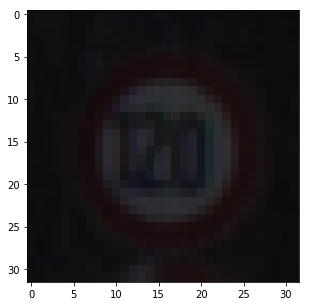

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.

%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(5,5))
plt.imshow(image)

print("image label = ",y_train[index])

In [5]:
#print(image)
print("data type =",image.dtype)
print("shape = ",image.shape)
f = np.array(image, dtype=np.float32).flatten()
print(f)
print(f.dtype)

data type = uint8
shape =  (32, 32, 3)
[ 15.  15.  17. ...,  14.  12.  14.]
float32


data type = uint8
shape =  (32, 32, 3)


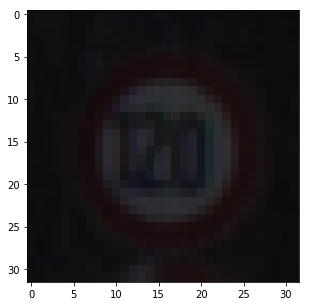

In [6]:
import scipy.ndimage

def create_new_image(my_image):
    force = random.choice([True, False])
    if (force):
        my_image = scipy.ndimage.interpolation.shift(my_image, [random.randrange(-2, 2), random.randrange(-2, 2), 0])
    else:
        my_image = scipy.ndimage.interpolation.rotate(my_image, random.randrange(-10, 10), reshape=False)
    return my_image

new_image = create_new_image(image)
print("data type =",new_image.dtype)
print("shape = ",new_image.shape)


plt.figure(figsize=(5,5))
plt.imshow(new_image)


data type = uint8
shape =  (32, 32, 3)
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [161 182 227]
  ..., 
  [149 174 222]
  [  0   0   0]
  [  0   0   0]]

 ..., 
 [[  0   0   0]
  [  0   0   0]
  [ 38  35  38]
  ..., 
  [118 141 179]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


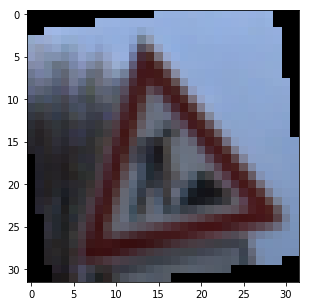

In [7]:
new_image = scipy.ndimage.interpolation.rotate(image, random.randrange(-10, 10), reshape=False)
print("data type =",new_image.dtype)
print("shape = ",new_image.shape)


plt.figure(figsize=(5,5))
plt.imshow(new_image)
print(new_image)

False


<Container object of 43 artists>

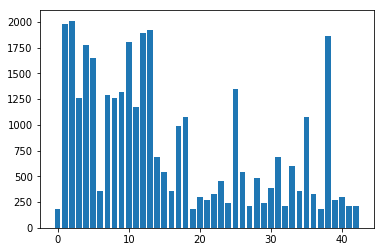

In [7]:
print(401% 100 == 0)

hist = []
for i in range(43):
    hist.append(np.sum(y_train == i))
    
plt.bar(range(43), hist)

max number per class train =  2010
add this number of new images train =  [1830   30    0  750  240  360 1650  720  750  690  210  840  120   90 1320
 1470 1650 1020  930 1830 1710 1740 1680 1560 1770  660 1470 1800 1530 1770
 1620 1320 1800 1411 1650  930 1680 1830  150 1740 1710 1800 1800]


<Container object of 43 artists>

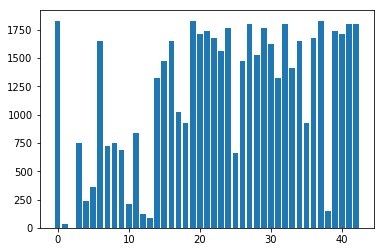

In [8]:
import scipy.ndimage

# Set up number of new images to create for training data
inputs_per_class_train = np.bincount(y_train)
max_inputs_train = np.max(inputs_per_class_train)
print("max number per class train = ",max_inputs_train)
diff_per_class_train= max_inputs_train -inputs_per_class_train
print("add this number of new images train = ", diff_per_class_train)

#This should be inverted version of above histogram

    
plt.bar(range(43), diff_per_class_train)


max number per class valid =  240
add this number of new images train =  [210   0   0  90  30  30 180  90  90  90  30  90  30   0 150 150 180 120
 120 210 180 180 180 180 210  90 180 210 180 210 180 150 210 150 180 120
 180 210  30 210 180 210 210]


<Container object of 43 artists>

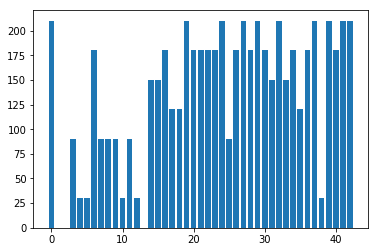

In [9]:
# Set up number of new images to create for validation data
inputs_per_class_valid = np.bincount(y_valid)
max_inputs_valid = np.max(inputs_per_class_valid)
print("max number per class valid = ",max_inputs_valid)
diff_per_class_valid= max_inputs_valid -inputs_per_class_valid
print("add this number of new images train = ", diff_per_class_valid)

#This should be inverted version of above histogram

    
plt.bar(range(43), diff_per_class_valid)

In [10]:
print (X_train.shape)
print (X_train.dtype)
print (X_valid.shape)
print (X_valid.dtype)
print (X_test.shape)
print (X_test.dtype)

(34799, 32, 32, 3)
uint8
(4410, 32, 32, 3)
uint8
(12630, 32, 32, 3)
uint8


In [ ]:
#Create new number of images from each class of training data according to above histogram

X_train_new = np.zeros([1,32,32,3])
y_train_new = np.zeros([1])

for class_no in range(len(inputs_per_class_train)):
    
    print("class no = ",class_no)
    where_am_i = np.where(y_train == class_no)
    
    input_ratio = int(max_inputs_train / inputs_per_class_train[class_no]) - 1
    if(input_ratio <=1):
        input_ratio = 1
    print("input_ratio = ",input_ratio)
    
    #Loop through mask of images in the class input_ratio number of times
    #Initial limit is when each class will have 2010 images including original data set.
    #This is too many. Only create 20% of that
    count = 0
    #Set limit to 20% of original expected new images
    limit = diff_per_class_train[class_no]*0.02
    print("create ",limit," new images")
    while(count <=limit):
        print("count number of new images = ",count)
        for x in X_train[where_am_i]:
            if(count % 100 == 0):
                print("count number of new images = ",count)
            new_image = create_new_image(x)
            new_image = np.expand_dims(new_image, axis=0)
            
            if(count ==0):
                X_train_new[0] = new_image
                y_train_new[0] = class_no
                count= count+1
            elif(count<=limit):
                X_train_new = np.vstack((X_train_new,new_image)) 
                y_train_new = np.vstack((y_train_new,class_no))
                count= count+1
            

print("Done")
print("X_train_new shape = ",X_train_new.shape)     
print("y_train_new shape = ",y_train_new.shape)
y_train_new = np.squeeze(y_train_new, axis=(1,))
print("y_train_new shape = ",y_train_new.shape)

hist = []
for i in range(43):
    hist.append(np.sum(y_train_new == i))
    
plt.bar(range(43), hist)


class no =  0
input_ratio =  7
create  63.0  new images
count number of new images =  0
count number of new images =  0
count number of new images =  30
count number of new images =  60
class no =  1
input_ratio =  1
create  0.0  new images
count number of new images =  0
count number of new images =  0
class no =  2
input_ratio =  1
create  0.0  new images
count number of new images =  0
count number of new images =  0
class no =  3
input_ratio =  1
create  27.0  new images
count number of new images =  0
count number of new images =  0
class no =  4
input_ratio =  1
create  9.0  new images
count number of new images =  0
count number of new images =  0
class no =  5
input_ratio =  1
create  9.0  new images
count number of new images =  0
count number of new images =  0
class no =  6
input_ratio =  3
create  54.0  new images
count number of new images =  0
count number of new images =  0
class no =  7
input_ratio =  1
create  27.0  new images
count number of new images =  0
count numb

<Container object of 43 artists>

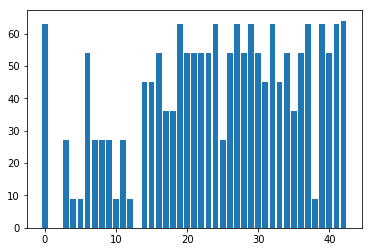

In [11]:
#Create new number of images from each class of validation data according to above histogram

X_valid_new = np.zeros([1,32,32,3])
y_valid_new = np.zeros([1])

for class_no in range(len(inputs_per_class_valid)):
    
    print("class no = ",class_no)
    where_am_i = np.where(y_valid == class_no)
    
    input_ratio = int(max_inputs_valid / inputs_per_class_valid[class_no]) - 1
    if(input_ratio <=1):
        input_ratio = 1
    print("input_ratio = ",input_ratio)
    
    #Loop through mask of images in the class input_ratio number of times
    #Initial limit is when each class will have 2010 images including original data set.
    #This is too many. Only create 20% of that
    count = 0
    #Set limit to 10% of original expected new images
    limit = diff_per_class_valid[class_no]*0.3
    print("create ",limit," new images")
    while(count <=limit):
        print("count number of new images = ",count)
        for x in X_valid[where_am_i]:
            if(count % 100 == 0):
                print("count number of new images = ",count)
            new_image = create_new_image(x)
            new_image = np.expand_dims(new_image, axis=0)
            
            if(count ==0):
                X_valid_new[0] = new_image
                y_valid_new[0] = class_no
                count= count+1
            elif(count<=limit):
                X_valid_new = np.vstack((X_valid_new,new_image)) 
                y_valid_new = np.vstack((y_valid_new,class_no))
                count= count+1
            

print("Done")
print("X_valid_new shape = ",X_valid_new.shape)     
print("y_valid_new shape = ",y_valid_new.shape)
y_valid_new = np.squeeze(y_valid_new, axis=(1,))
print("y_valid_new shape = ",y_valid_new.shape)

hist = []
for i in range(43):
    hist.append(np.sum(y_valid_new == i))
    
plt.bar(range(43), hist)


In [11]:
#Change data back to uint8
print("X_train new shape =", X_train_new.shape)
print("X_train new dtype = ",X_train_new.dtype)
print("y_train new shape =", y_train_new.shape)
print("y_train new dtype = ",y_train_new.dtype)

NameError: name 'X_train_new' is not defined

In [ ]:
# Save the augmented training data set, so we don't have to create it everytime 

training_X_new_file = "X_train_new.p"
training_y_new_file = "y_train_new.p"

#validation_preprocessed_file = "data/X_valid_preprocessed.p"
#testing_preprocessed_file = "data/X_test_preprocessed.p"

pickle.dump(X_train_new, open(training_X_new_file, "wb" ))
pickle.dump(y_train_new, open(training_y_new_file, "wb" ))


print("done")


In [12]:
#Change data back to uint8
print("X_valid new shape =", X_valid_new.shape)
print("X_valid new dtype = ",X_valid_new.dtype)
print("y_valid new shape =", y_valid_new.shape)
print("y_valid new dtype = ",y_valid_new.dtype)

X_valid new shape = (1774, 32, 32, 3)
X_valid new dtype =  float64
y_valid new shape = (1774,)
y_valid new dtype =  float64


In [13]:
print(X_valid)
print(X_valid_new)

[[[[13 12 12]
   [12 11 12]
   [13 11 11]
   ..., 
   [14 12 11]
   [13 12 11]
   [12 12 11]]

  [[13 12 13]
   [12 11 12]
   [13 12 12]
   ..., 
   [13 12 11]
   [13 12 11]
   [12 12 11]]

  [[13 12 13]
   [12 11 12]
   [12 12 12]
   ..., 
   [13 12 11]
   [13 12 11]
   [12 12 11]]

  ..., 
  [[16 15 15]
   [15 14 14]
   [15 15 15]
   ..., 
   [13 12 12]
   [14 13 13]
   [14 13 13]]

  [[18 16 16]
   [17 15 15]
   [18 16 16]
   ..., 
   [12 11 11]
   [13 12 12]
   [14 13 13]]

  [[19 17 17]
   [18 16 16]
   [19 17 17]
   ..., 
   [12 12 12]
   [13 13 13]
   [15 14 14]]]


 [[[14 12 12]
   [12 12 12]
   [12 13 13]
   ..., 
   [15 12 11]
   [14 13 12]
   [13 13 12]]

  [[13 12 12]
   [12 12 13]
   [13 13 13]
   ..., 
   [14 13 11]
   [15 14 13]
   [13 13 12]]

  [[12 12 12]
   [12 12 13]
   [12 12 12]
   ..., 
   [13 12 11]
   [14 13 12]
   [13 12 12]]

  ..., 
  [[15 14 14]
   [15 14 14]
   [14 13 13]
   ..., 
   [14 14 14]
   [14 15 14]
   [13 13 12]]

  [[16 15 15]
   [16 15 15]
   [

In [14]:
#Change from float64 to uint8
X_valid_new = X_valid_new.astype(np.uint8)
y_valid_new = y_valid_new.astype(np.uint8)

In [15]:
print("X_valid new shape =", X_valid_new.shape)
print("X_valid new dtype = ",X_valid_new.dtype)
print("y_valid new shape =", y_valid_new.shape)
print("y_valid new dtype = ",y_valid_new.dtype)

X_valid new shape = (1774, 32, 32, 3)
X_valid new dtype =  uint8
y_valid new shape = (1774,)
y_valid new dtype =  uint8


In [16]:
# Save the augmented validation data set, so we don't have to create it everytime 

validation_X_new_file = "X_valid_new.p"
validation_y_new_file = "y_valid_new.p"

#validation_preprocessed_file = "data/X_valid_preprocessed.p"
#testing_preprocessed_file = "data/X_test_preprocessed.p"

pickle.dump(X_valid_new, open(validation_X_new_file, "wb" ))
pickle.dump(y_valid_new, open(validation_y_new_file, "wb" ))


print("done")

done


In [17]:
#Load previously created data

training_X_file = "X_train_new.p"
training_y_file = "y_train_new.p"



with open(training_X_file, mode='rb') as f:
    X_train_new = pickle.load(f)
print("X_train_new loaded")
print("X_train_new shape =",X_train_new.shape)
with open(training_y_file, mode='rb') as f:
    y_train_new = pickle.load(f)
print("y_train_new loaded")
print("y_train_new shape =",y_train_new.shape)

X_train_new loaded
X_train_new shape = (10327, 32, 32, 3)
y_train_new loaded
y_train_new shape = (10327,)


In [18]:
#Add X_train_new to X_train
print("X_train shape =",X_train.shape)
print("X_train_new shape =",X_train_new.shape)
print("X_train dtype =", X_train.dtype)
print("X_train new dtype =", X_train_new.dtype)
X_train_new = X_train_new.astype(np.uint8)
print("X_train new dtype =", X_train_new.dtype)

print("y_train shape =",y_train.shape)
print("y_train_new shape =",y_train_new.shape)
print("y_train dtype =", y_train.dtype)
print("y_train new dtype =", y_train_new.dtype)
y_train_new = y_train_new.astype(np.uint8)
print("y_train new dtype =", y_train_new.dtype)

print(y_train)
print(y_train_new)
X_train_combined = np.vstack((X_train,X_train_new))
#y_train_combined = np.vstack((y_train,y_train_new))
y_train_combined = np.hstack((y_train,y_train_new))
print("X_train_combined shape =",X_train_combined.shape)
print("X_train combined dtype =", X_train_combined.dtype)
print("y_train_combined shape =",y_train_combined.shape)
print("y_train combined dtype =", y_train_combined.dtype)

X_train shape = (34799, 32, 32, 3)
X_train_new shape = (10327, 32, 32, 3)
X_train dtype = uint8
X_train new dtype = uint8
X_train new dtype = uint8
y_train shape = (34799,)
y_train_new shape = (10327,)
y_train dtype = uint8
y_train new dtype = uint8
y_train new dtype = uint8
[41 41 41 ..., 25 25 25]
[42  0  0 ..., 42 42 42]
X_train_combined shape = (45126, 32, 32, 3)
X_train combined dtype = uint8
y_train_combined shape = (45126,)
y_train combined dtype = uint8


In [19]:
print("X_train_combined shape =",X_train_combined.shape)
print("X_train combined dtype =", X_train_combined.dtype)
print("y_train_combined shape =",y_train_combined.shape)
print("y_train combined dtype =", y_train_combined.dtype)

X_train_combined shape = (45126, 32, 32, 3)
X_train combined dtype = uint8
y_train_combined shape = (45126,)
y_train combined dtype = uint8


In [20]:
#Load previously created data

validation_X_file = "X_valid_new.p"
validation_y_file = "y_valid_new.p"



with open(validation_X_file, mode='rb') as f:
    X_valid_new = pickle.load(f)
print("X_valid_new loaded")
print("X_valid_new shape =",X_valid_new.shape)
with open(validation_y_file, mode='rb') as f:
    y_valid_new = pickle.load(f)
print("y_valid_new loaded")
print("y_valid_new shape =",y_valid_new.shape)

X_valid_new loaded
X_valid_new shape = (1774, 32, 32, 3)
y_valid_new loaded
y_valid_new shape = (1774,)


In [21]:
#Add new validation data to original validation data
#Add X_train_new to X_train
print("X_valid shape =",X_valid.shape)
print("X_valid_new shape =",X_valid_new.shape)
print("X_valid dtype =", X_valid.dtype)
print("X_valid new dtype =", X_valid_new.dtype)
X_train = X_train.astype(np.uint8)
print("X_train dtype =", X_train.dtype)

print("y_valid shape =",y_valid.shape)
print("y_valid_new shape =",y_valid_new.shape)
print("y_valid dtype =", y_valid.dtype)
print("y_valid new dtype =", y_valid_new.dtype)
#y_train_new = y_train_new.astype(np.uint8)
#print("y_train new dtype =", y_train_new.dtype)

#print(y_valid)
#print(y_valid_new)
#print(X_valid)
#print(X_valid_new)
X_valid_combined = np.vstack((X_valid,X_valid_new))
#y_train_combined = np.vstack((y_train,y_train_new))
y_valid_combined = np.hstack((y_valid,y_valid_new))
print("X_valid_combined shape =",X_valid_combined.shape)
print("X_valid combined dtype =", X_valid_combined.dtype)
print("y_valid_combined shape =",y_valid_combined.shape)
print("y_valid combined dtype =", y_valid_combined.dtype)

X_valid shape = (4410, 32, 32, 3)
X_valid_new shape = (1774, 32, 32, 3)
X_valid dtype = uint8
X_valid new dtype = uint8
X_train dtype = uint8
y_valid shape = (4410,)
y_valid_new shape = (1774,)
y_valid dtype = uint8
y_valid new dtype = uint8
X_valid_combined shape = (6184, 32, 32, 3)
X_valid combined dtype = uint8
y_valid_combined shape = (6184,)
y_valid combined dtype = uint8


<Container object of 43 artists>

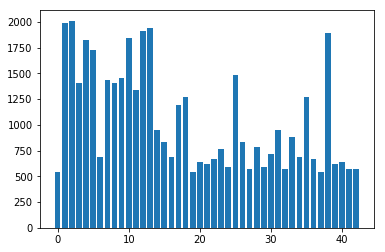

In [22]:
#Histogram all data including new and old
hist = []
for i in range(43):
    hist.append(np.sum(y_train_combined == i))
    
plt.bar(range(43), hist)

<Container object of 43 artists>

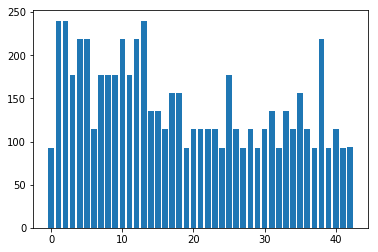

In [23]:
#Histogram all data including new and old
hist = []
for i in range(43):
    hist.append(np.sum(y_valid_combined == i))
    
plt.bar(range(43), hist)

In [ ]:
print(np.sum(diff_per_class)*0.2)
print(limit)

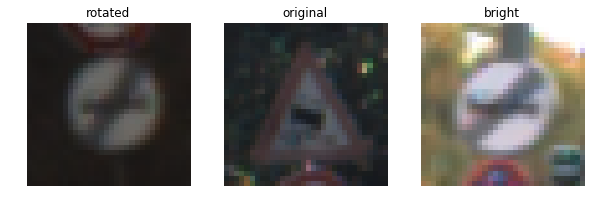

In [24]:
fig, axs = plt.subplots(1,3, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('rotated')
axs[0].imshow(X_train_combined[1])

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_train_combined[2000])

axs[2].axis('off')
axs[2].set_title('bright')
axs[2].imshow(X_train_combined[100])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [25]:
import warnings
from skimage import exposure

def preprocess(X):
    '''
    - convert images to grayscale, 
    - scale from [0, 255] to [0, 1] range, 
    - use localized histogram equalization as images differ 
      in brightness and contrast significantly
    ADAPTED FROM: http://navoshta.com/traffic-signs-classification/
    '''

    #Convert to grayscale, e.g. single channel Y
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]

    #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)
    
    #adjust histogram
    for i in range(X.shape[0]):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            X[i] = exposure.equalize_adapthist(X[i]) 
            
    return X

def reshape(x): # Add a single grayscale channel
  return x.reshape(x.shape + (1,))

In [ ]:
X_train_preprocessed = preprocess(X_train)
X_train = reshape(X_train_preprocessed)
print("X_train shape = ",X_train.shape)
print("X_train type =", X_train.dtype)

In [ ]:
X_valid_preprocessed = preprocess(X_valid)
X_valid = reshape(X_valid_preprocessed)
print("X_valid shape = ",X_valid.shape)
print("X_valid type =", X_valid.dtype)

In [ ]:
X_test_preprocessed = preprocess(X_test)
X_test = reshape(X_test_preprocessed)
print("X_test shape = ",X_test.shape)
print("X_test type =", X_test.dtype)

In [26]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


#Pre Process the data by shuffling
from sklearn.utils import shuffle
import warnings
from skimage import exposure

X_train, y_train = shuffle(X_train_combined, y_train_combined)
X_valid, y_valid = shuffle(X_valid_combined, y_valid_combined)
#X_train, y_train = shuffle(X_train, y_train)

#adjust histogram
#for i in range(X_train.shape[0]):
#    with warnings.catch_warnings():
#        warnings.simplefilter("ignore")
#        X_train[i] = exposure.equalize_adapthist(X_train[i]) 

print(X_train.shape, X_train.dtype)
X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
X_test = X_test.astype(np.float32)

print(X_train.shape, X_train.dtype)
print(X_valid.shape, X_valid.dtype)

print("finished preprocessing the data")

#Define the model architecture.
#Starting with LeNet


#Setup Tensorflow 

import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 50
#batch size prviously 128

(45126, 32, 32, 3) uint8
(45126, 32, 32, 3) float32
(6184, 32, 32, 3) float32
finished preprocessing the data


In [27]:
#Normalise the data
def normalize_image(image_data):
    a = -0.5
    b = 0.5
    minvalue = 0
    maxvalue = 255
    normimg = np.array(a + ( ( (image_data - minvalue)*(b - a) )/( maxvalue - minvalue ) ) )
    return normimg

print(X_train.shape, X_train.dtype)
print(X_train[0])
X_train = normalize_image(X_train)
print("Normalising")
print(X_train.shape, X_train.dtype)
print(X_train[0])

X_valid = normalize_image(X_valid)
X_test = normalize_image(X_test)

(45126, 32, 32, 3) float32
[[[   0.    0.    0.]
  [  74.   83.   82.]
  [  70.   73.   71.]
  ..., 
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[   0.    0.    0.]
  [  69.   77.   73.]
  [  65.   69.   65.]
  ..., 
  [  92.  106.  109.]
  [  88.  105.  109.]
  [  70.   79.   83.]]

 [[   0.    0.    0.]
  [  71.   77.   74.]
  [  67.   70.   67.]
  ..., 
  [  94.  106.  109.]
  [  89.  105.  106.]
  [  65.   72.   71.]]

 ..., 
 [[  61.   60.   53.]
  [  58.   57.   47.]
  [  57.   55.   45.]
  ..., 
  [  49.   48.   47.]
  [  50.   48.   45.]
  [   0.    0.    0.]]

 [[  56.   57.   51.]
  [  54.   52.   45.]
  [  55.   51.   47.]
  ..., 
  [  47.   48.   47.]
  [  48.   47.   45.]
  [   0.    0.    0.]]

 [[   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]
  ..., 
  [  48.   46.   45.]
  [  48.   46.   45.]
  [   0.    0.    0.]]]
Normalising
(45126, 32, 32, 3) float32
[[[-0.5        -0.5        -0.5       ]
  [-0.20980391 -0.17450979 -0.17843

In [ ]:
print(X_train.dtype)

### Model Architecture

In [28]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#LeNet accepts 32x32xC where C is the 3 is colour. MNIST data is greyscale so C=1

#LeNEt Architecture

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3 
    #(changed input depth from 1 to 3 due to colour). Output = 28x28x6.
    #(changed input depth from 3 to 1 due to grayscale function). Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.(changed output from 10 to 43 classes)
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [30]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


#Train LeNet to classify MNIST Data 
# x is a placeholder for a batch of input images
# y is a placeholder for a batch of output labels

#Update tensor shapes for colour depth and number of classes
#Update tensor shapes for colour depth and number of classes colour is grey only

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
#x = tf.placeholder(tf.float32, (None, 32, 32))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

#Training Pipeline

rate = 0.00088

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

training_loss_history = [] 
validation_loss_history = []
training_accuracy_history = [] 
validation_accuracy_history = []


#Model Evaluation
#Evaluate loss and accuracy of the model for a given data set.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.8})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


#Train the Model
#Run the training data through the training pipeline to train the model

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.8})
        train_accuracy = evaluate(X_train, y_train)
        print("batch = {} ...".format(offset+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print()
       # train_loss, train_accuracy = evaluate(X_train, y_train)
        #training_loss_history.append(train_loss)
        #training_accuracy_history.append(train_accuracy)
        
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    #Now test the model on test data and measure accuracy
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    #Commenting out saving the session   
    saver.save(sess, './lenet')
    print("Model saved")


Training...

batch = 45101 ...
Train Accuracy = 0.801

EPOCH 1 ...
Validation Accuracy = 0.699

batch = 45101 ...
Train Accuracy = 0.894

EPOCH 2 ...
Validation Accuracy = 0.789

batch = 45101 ...
Train Accuracy = 0.921

EPOCH 3 ...
Validation Accuracy = 0.822

batch = 45101 ...
Train Accuracy = 0.946

EPOCH 4 ...
Validation Accuracy = 0.849

batch = 45101 ...
Train Accuracy = 0.958

EPOCH 5 ...
Validation Accuracy = 0.868

batch = 45101 ...
Train Accuracy = 0.961

EPOCH 6 ...
Validation Accuracy = 0.862

batch = 45101 ...
Train Accuracy = 0.968

EPOCH 7 ...
Validation Accuracy = 0.879

batch = 45101 ...
Train Accuracy = 0.967

EPOCH 8 ...
Validation Accuracy = 0.883

batch = 45101 ...
Train Accuracy = 0.975

EPOCH 9 ...
Validation Accuracy = 0.892

batch = 45101 ...
Train Accuracy = 0.975

EPOCH 10 ...
Validation Accuracy = 0.888

batch = 45101 ...
Train Accuracy = 0.980

EPOCH 11 ...
Validation Accuracy = 0.891

batch = 45101 ...
Train Accuracy = 0.982

EPOCH 12 ...
Validation Accura

EPOCH 98 ...
Validation Accuracy = 0.928

batch = 45101 ...
Train Accuracy = 0.996

EPOCH 99 ...
Validation Accuracy = 0.935

batch = 45101 ...
Train Accuracy = 0.996

EPOCH 100 ...
Validation Accuracy = 0.928

Test Accuracy = 0.940
Model saved


In [ ]:
print(X_valid[0])

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['images/speed_50_001.jpg', 'images/speed_80_001.jpg', 'images/pedxing_001.jpg', 'images/slippery_road_001.jpg', 'images/sign_1.jpeg']


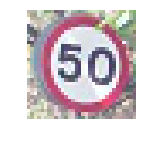

(32, 32, 3)
(32, 32, 3)
label =  2


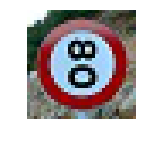

(32, 32, 3)
(32, 32, 3)
label =  5


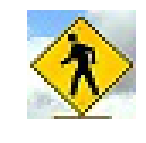

(32, 32, 3)
(32, 32, 3)
label =  27


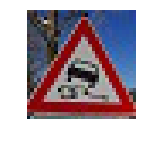

(32, 32, 3)
(32, 32, 3)
label =  23


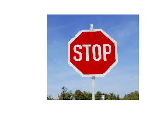

(210, 240, 3)
(32, 32, 3)
label =  14


In [31]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg

webbies = []
path = "images/"

for img in os.listdir(path):
    image = path + img
    webbies.append(image)

web_images = np.zeros((len(webbies), 32, 32, 3), dtype = np.uint8)
web_labels = [2,5,27,23,14]
print(webbies)
i=1
for i in range(len(webbies)):
    image = mpimg.imread(webbies[i])
    image_small = cv2.resize(image, (32, 32)) 
    web_images[i] = image_small
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    print(image.shape)
    print(image_small.shape)
    print("label = ",web_labels[i])


In [32]:
web_images = web_images.astype(np.float32)
web_images = normalize_image(web_images)
print(web_images.shape)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    result_logits = sess.run(logits, feed_dict={x: web_images, keep_prob: 0.8})
    result_label = np.argmax(result_logits, axis=1)
    
print("result_logits = ",result_logits)
print("result_label = ",result_label)
normalize_image

(5, 32, 32, 3)
result_logits =  [[ -37.36751938   -9.19032192   -7.24594688   -5.5158782   -28.38191986
     3.11601782  -28.7729702   -27.38933945  -16.94636917  -28.88921928
   -36.21582794  -19.6462059   -41.68995667  -46.18574905  -39.4485321
   -25.4360199   -36.66458893  -75.8168335   -20.62425995  -22.44187355
   -26.0995903   -26.0391922   -53.9318924    -9.71664524  -37.53160095
   -36.02877808  -44.89167023  -19.02887535  -17.27198982  -15.59462261
   -41.6334877   -24.36134148  -33.82936859  -48.50431824  -48.10276794
   -38.95082855  -42.72492599  -37.32637405  -30.86910629  -50.24450302
   -18.67466164  -30.96986771  -34.45613098]
 [ -22.25226021  -12.46033096  -25.52227402  -42.80721283  -35.72206116
   -29.13451767  -12.99457359   -3.47505569  -10.69479942  -33.77085495
   -51.96287918  -16.30329132  -21.8482914   -33.59082794  -78.8529129
   -43.89233017  -31.77908325  -50.79822159  -45.81924438  -31.45425987
   -12.26584435  -30.37339783  -73.36361694  -17.18316841  -4

<function __main__.normalize_image>

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [33]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    correct_pred = tf.equal(result_label, web_labels)
    accuracy_operation = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    accuracy = sess.run(accuracy_operation)
    print(accuracy)

0.4


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

[[  9.99782979e-01   1.78287519e-04   3.16054102e-05   4.52199902e-06
    2.67147561e-06]
 [  9.99852419e-01   1.45439088e-04   1.90244316e-06   1.06459950e-07
    2.21253504e-08]
 [  1.00000000e+00   1.97284269e-08   1.51671600e-08   1.21284183e-08
    3.17091087e-14]
 [  9.99996424e-01   3.59026149e-06   2.53953147e-09   2.17866991e-09
    3.50966706e-13]
 [  1.00000000e+00   1.43852037e-26   1.04322633e-34   3.27875278e-35
    0.00000000e+00]]


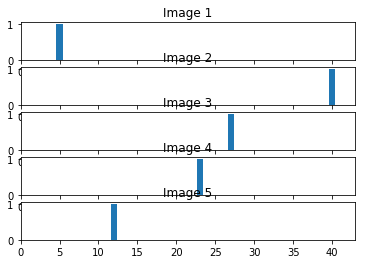

In [34]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    soft_max = tf.nn.softmax(logits)
    result = sess.run(soft_max, feed_dict={logits: result_logits})
    values, indices = tf.nn.top_k(result, 5)
    probs = sess.run(values)
    predictions = sess.run(indices)
    print(probs)

    for i in range(5):
        web_plot = plt.subplot(5,1,i+1)
        x_axis = range(43)
        web_plot.set_xlim([0, n_classes])
        web_plot.bar(predictions[i], probs[i])
        web_plot.set_title('Image ' + str(i+1))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [35]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")